# 女士品茶示例

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

In [2]:
n = [i for i in range(1,11)]
n_true = [np.power(.5,i) for i in n]
n_minus1_true = [(i * np.power(.5,i)) for i in n]

Text(0.5, 0, '$n$')

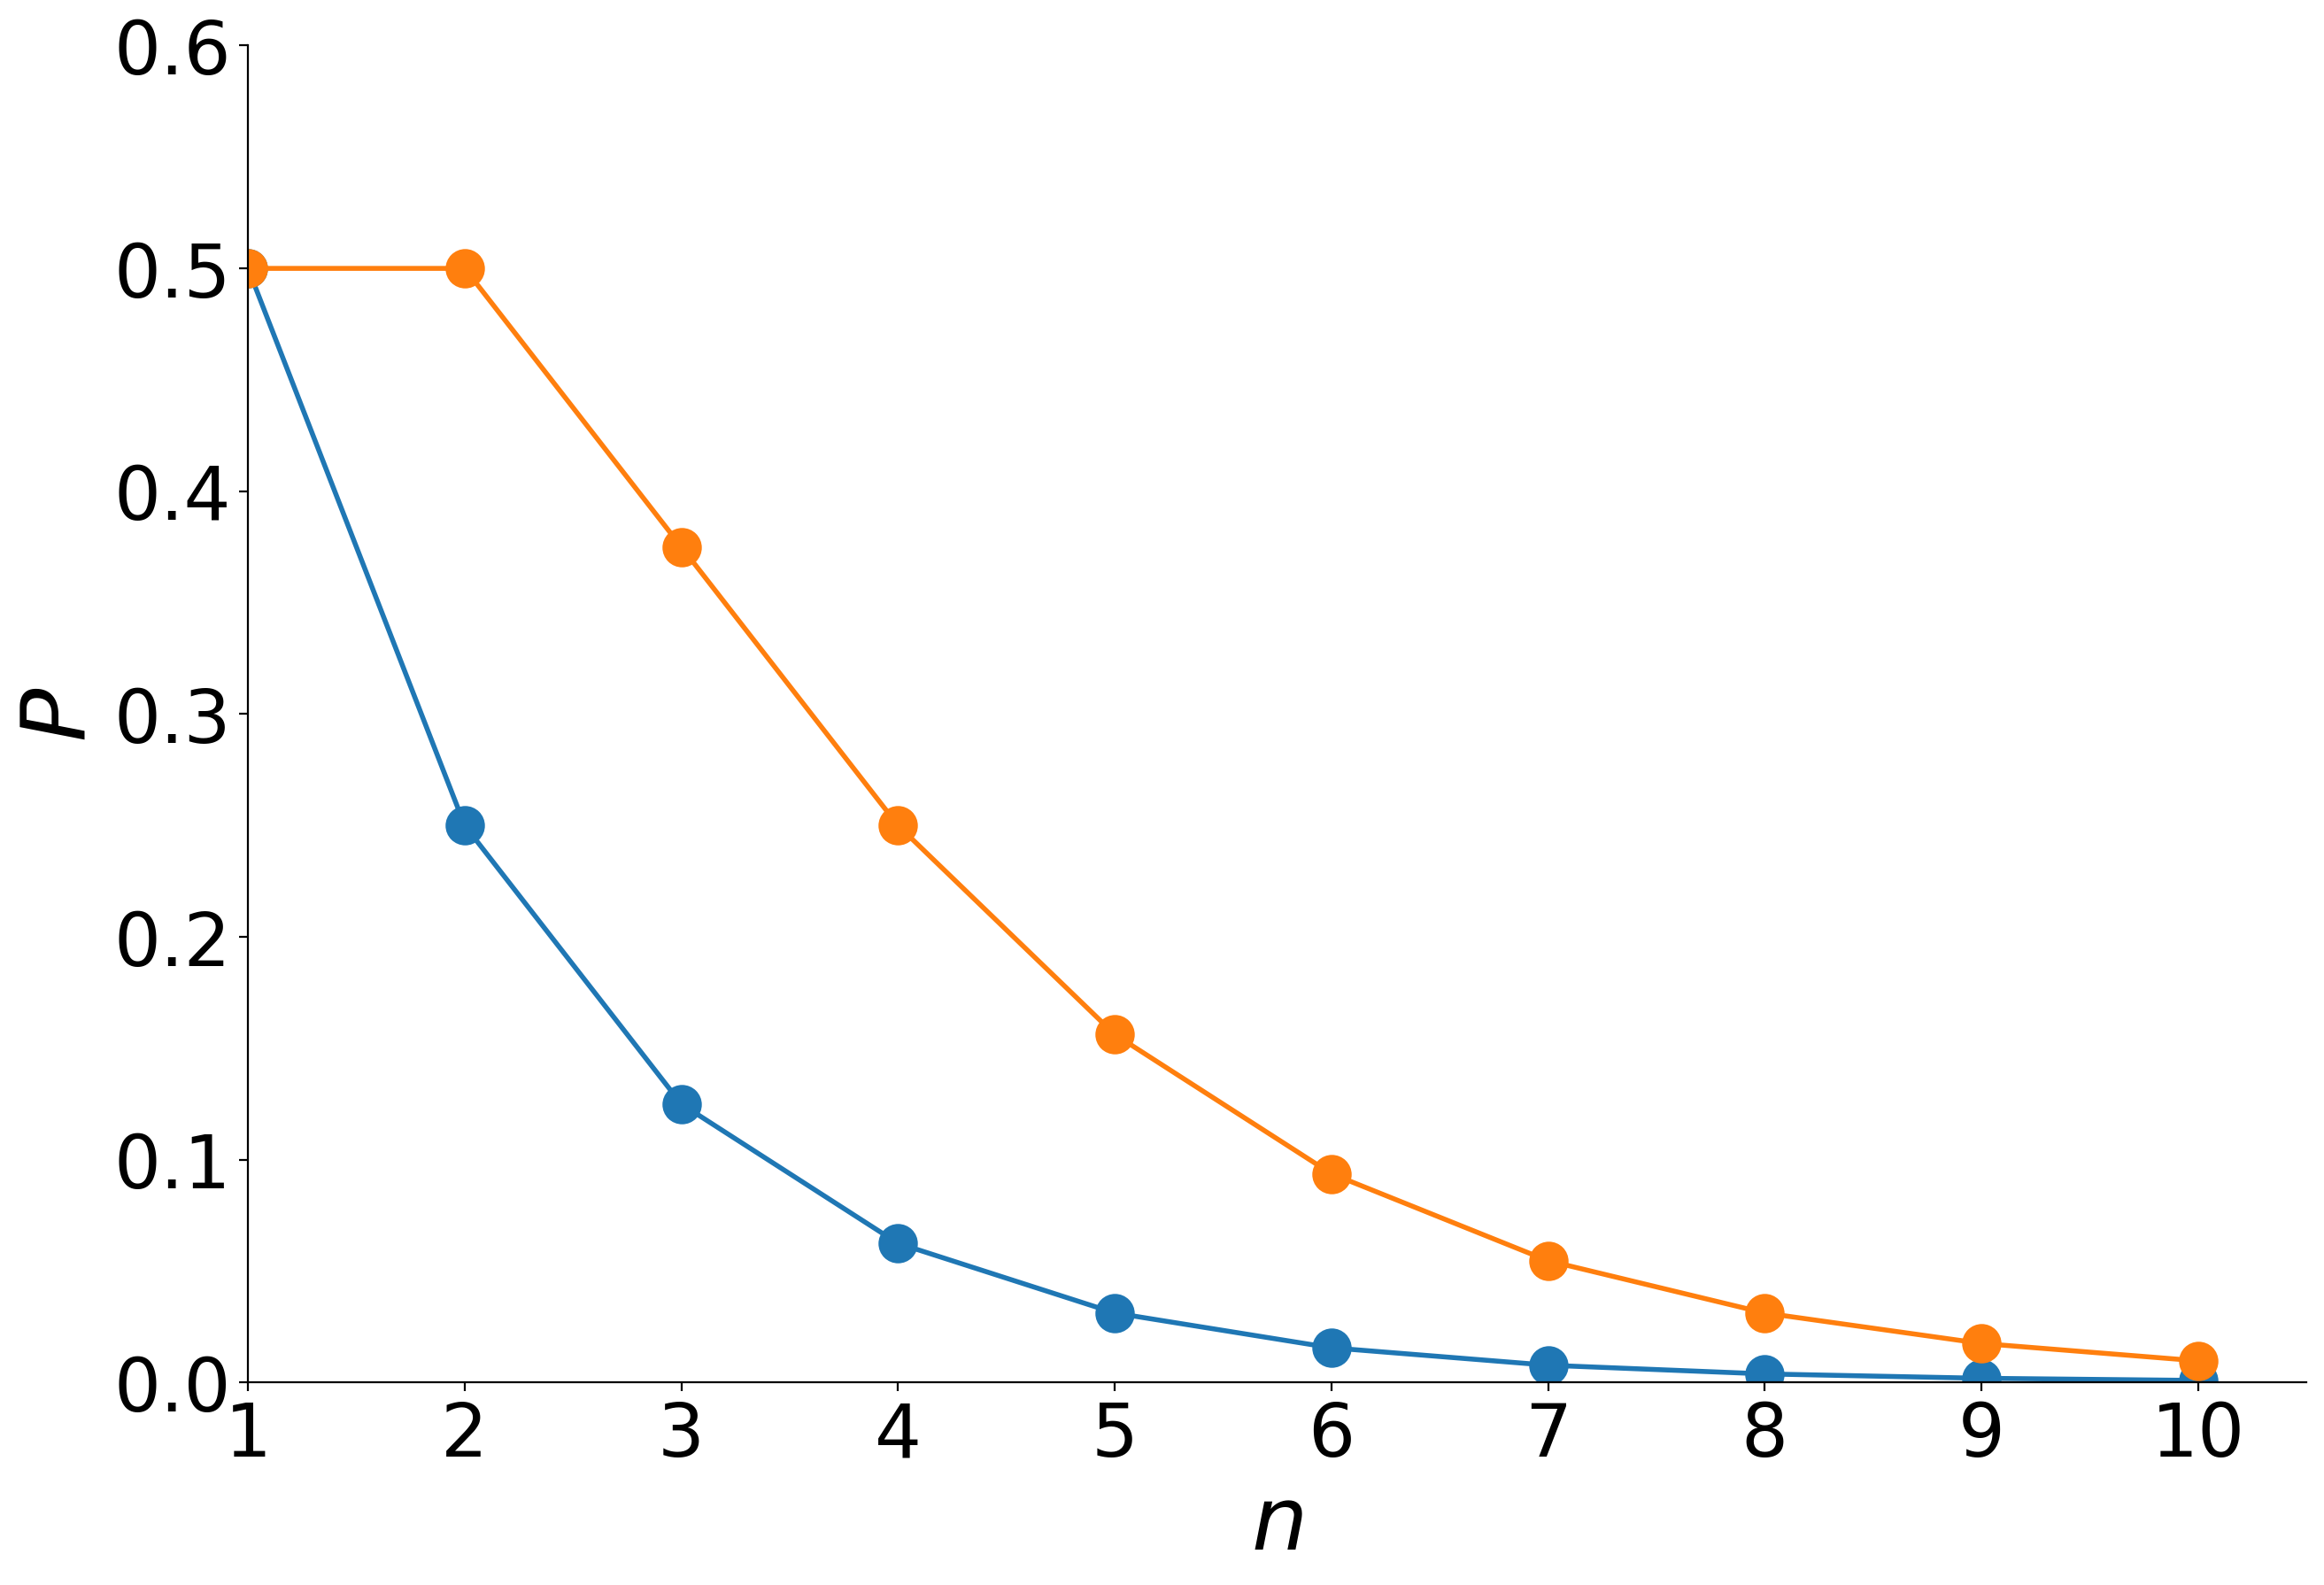

In [3]:
fig=plt.figure(dpi=200,figsize=(15,10))

ax1 = plt.subplot()
ax1.plot(n, n_true,linewidth=2,marker='o',color='#1f77b4',markersize=15)
ax1.plot(n,n_minus1_true,linewidth=2,marker='o',color='#ff7f0e',markersize=15)

ax1.set_xlim(1,10.5)
ax1.set_ylim(0,.6)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.xticks(n,n,fontsize=30)
plt.yticks(np.linspace(0,0.6,7),np.around(np.linspace(0,.6,7),2),fontsize=30)

plt.ylabel(r'$P$',fontsize=36)
plt.xlabel(r'$n$',fontsize=36)

# 例题的各个拒绝域

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 
from scipy.stats import t,chi2,norm

def normal_dis(x, mu=0, sigma=1):
    '''
    x： 输入待计算的值
    μ： (mu, 读作：谬) 为数学期望, 
    σ (sigma, 读作：西格玛）为标准差
    '''
    return 0.3989422804014327 / sigma * math.exp(- (x - mu) * (x - mu) / (2 * sigma * sigma))
    #return t.pdf(x,50)
    
def t_dis(x, df=24):
    return t.pdf(x,df)

def chi2_dis(x, df=24):
    return chi2.pdf(x,df)

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 正态拒绝域-双边

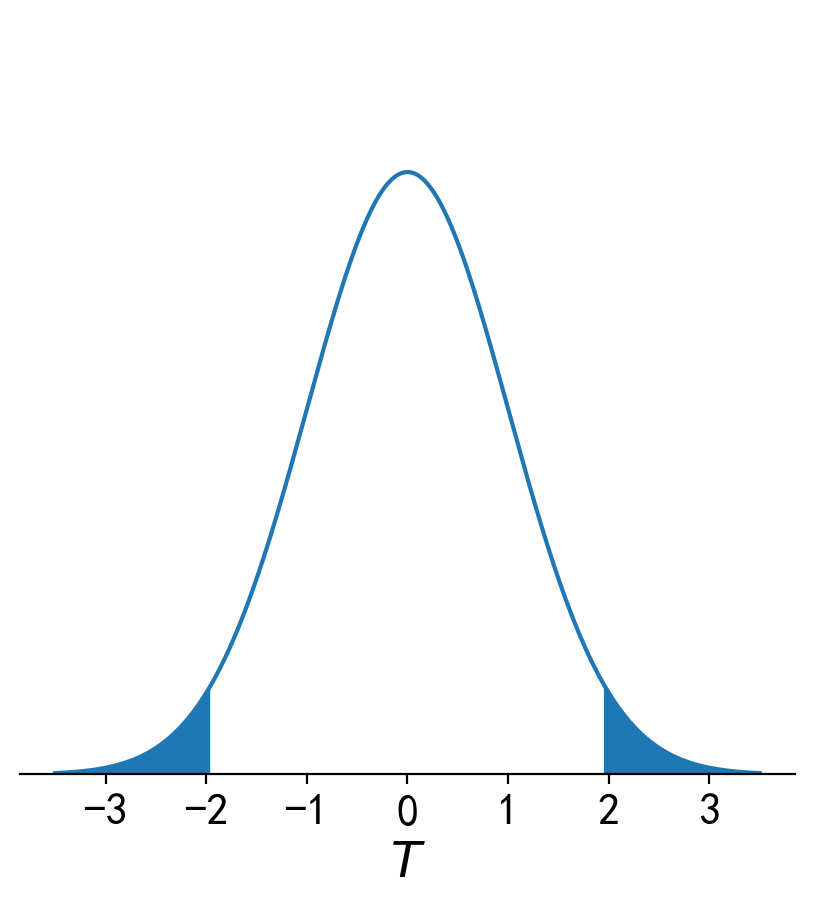

In [5]:
#norm
x_upper_bound, x_lower_bound = 3.5,-3.5#图x轴范围
rej_x_big,rej_x_small = 1.96,-1.96


xs = [x for x in np.linspace(x_lower_bound,x_upper_bound,800)]
ys = [normal_dis(x) for x in xs]
x_lower_fill = list(np.linspace(x_lower_bound,rej_x_small,int((rej_x_small-x_lower_bound)/0.01)))
x_upper_fill = list(np.linspace(rej_x_big,x_upper_bound,int((x_upper_bound-rej_x_big)/0.01)))

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)
plt.plot(xs, ys)

plt.ylim(0,0.5)

plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[normal_dis(x) for x in x_lower_fill])
plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[normal_dis(x) for x in x_upper_fill],color='#1f77b4')

plt.xticks([-3,-2,-1,0,1,2,3],fontsize=16)
plt.yticks([],fontsize=16)
plt.xlabel(r'$T$',fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('正态rej1.png')

## t分布拒绝域-双边

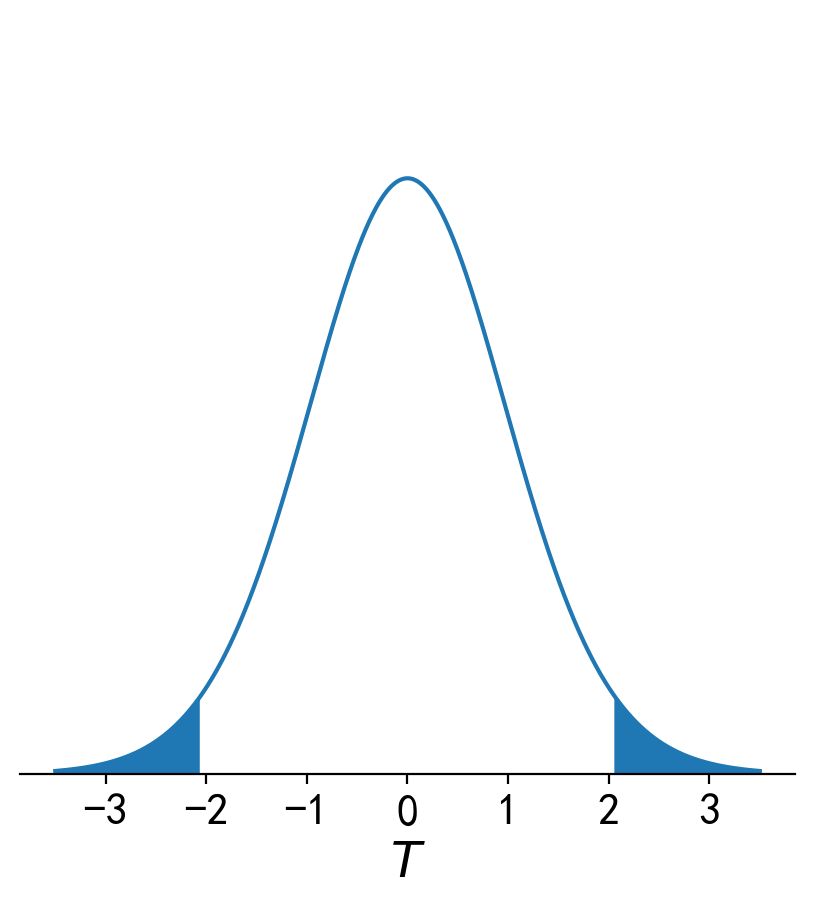

In [6]:
#t分布
df = 24
x_upper_bound, x_lower_bound = 3.5,-3.5#图x轴范围
rej_x_big,rej_x_small = t.ppf(.975,df),t.ppf(.025,df)


xs = [x for x in np.linspace(x_lower_bound,x_upper_bound,800)]
ys = [t_dis(x) for x in xs]
x_lower_fill = list(np.linspace(x_lower_bound,rej_x_small,int((rej_x_small-x_lower_bound)/0.01)))
x_upper_fill = list(np.linspace(rej_x_big,x_upper_bound,int((x_upper_bound-rej_x_big)/0.01)))

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)
plt.plot(xs, ys)

plt.ylim(0,0.5)

plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[t_dis(x) for x in x_lower_fill])
plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[t_dis(x) for x in x_upper_fill],color='#1f77b4')

plt.xticks([-3,-2,-1,0,1,2,3],fontsize=16)
plt.yticks([],fontsize=16)
plt.xlabel(r'$T$',fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('t24rej2.png')

## 卡方分布拒绝域-双边

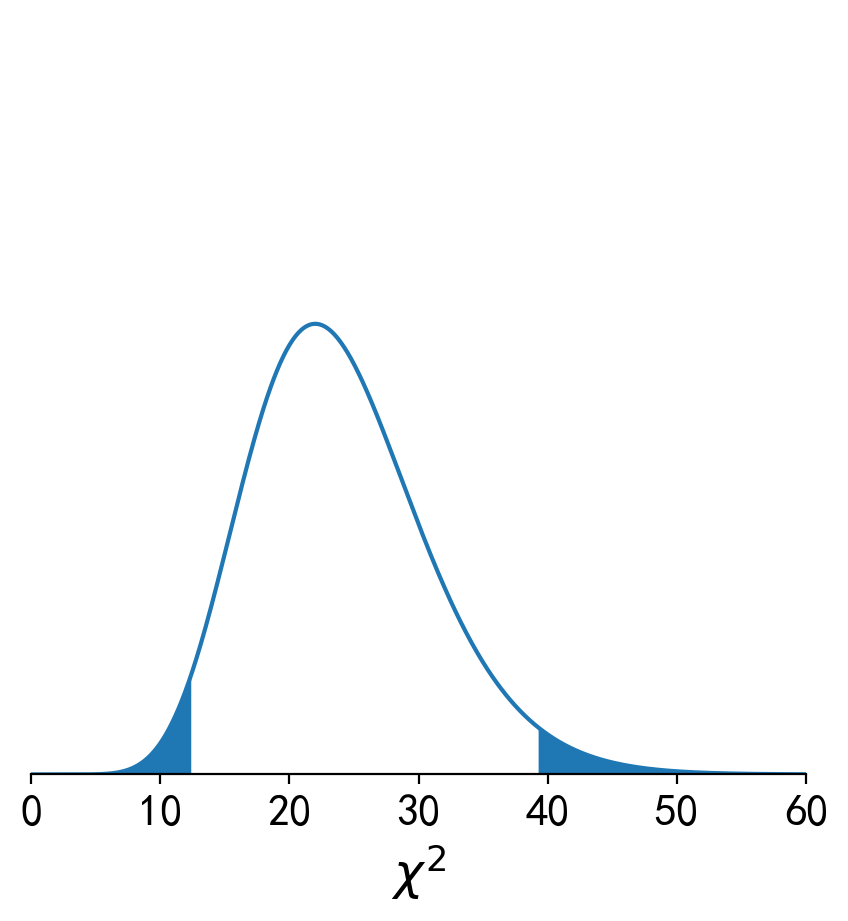

In [7]:
#chi2分布DF=24
df = 24
x_upper_bound, x_lower_bound = 60,0#图x轴范围
rej_x_big,rej_x_small = chi2.ppf(.975,df),chi2.ppf(.025,df)


xs = [x for x in np.linspace(x_lower_bound,x_upper_bound,1000)]
ys = [chi2_dis(x) for x in xs]
x_lower_fill = list(np.linspace(x_lower_bound,rej_x_small,int((rej_x_small-x_lower_bound)/0.1)))
x_upper_fill = list(np.linspace(rej_x_big,x_upper_bound,int((x_upper_bound-rej_x_big)/0.1)))

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)
plt.plot(xs, ys)

plt.ylim(0,0.1)
plt.xlim(0,60)

plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[chi2_dis(x) for x in x_lower_fill])
plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[chi2_dis(x) for x in x_upper_fill],color='#1f77b4')

plt.xticks(range(0,61,10),[x for x in range(0,61,10)],fontsize=16)
plt.yticks([],fontsize=16)
plt.xlabel(r'$\chi^2$',fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('chi24rej2.png')

## t分布拒绝域-单边

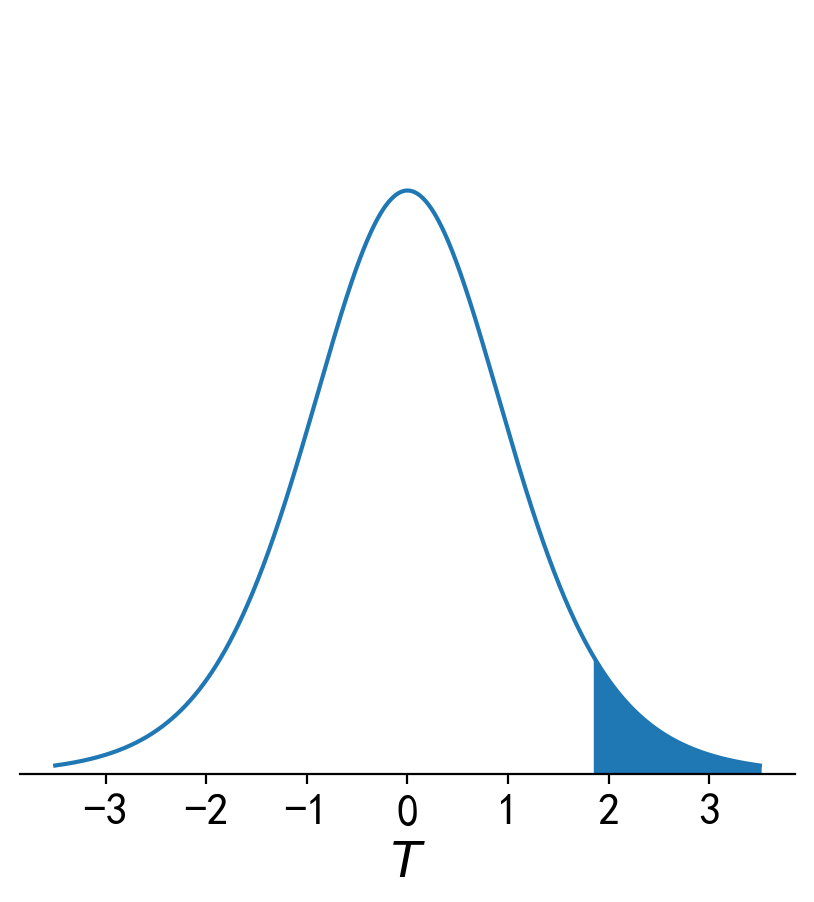

In [8]:
#t分布8
df = 8
x_upper_bound, x_lower_bound = 3.5,-3.5#图x轴范围
rej_x_big,rej_x_small = t.ppf(.95,df),t.ppf(.05,df)


xs = [x for x in np.linspace(x_lower_bound,x_upper_bound,800)]
ys = [t_dis(x,df) for x in xs]
x_lower_fill = list(np.linspace(x_lower_bound,rej_x_small,int((rej_x_small-x_lower_bound)/0.01)))
x_upper_fill = list(np.linspace(rej_x_big,x_upper_bound,int((x_upper_bound-rej_x_big)/0.01)))

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)
plt.plot(xs, ys)

plt.ylim(0,0.5)


plt.xticks([-3,-2,-1,0,1,2,3],fontsize=16)
plt.yticks([],fontsize=16)
plt.xlabel(r'$T$',fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[t_dis(x,df) for x in x_lower_fill])
plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[t_dis(x,df) for x in x_upper_fill],color='#1f77b4')

#plt.savefig('t8rej2.png')

## 卡方分布拒绝域-单边

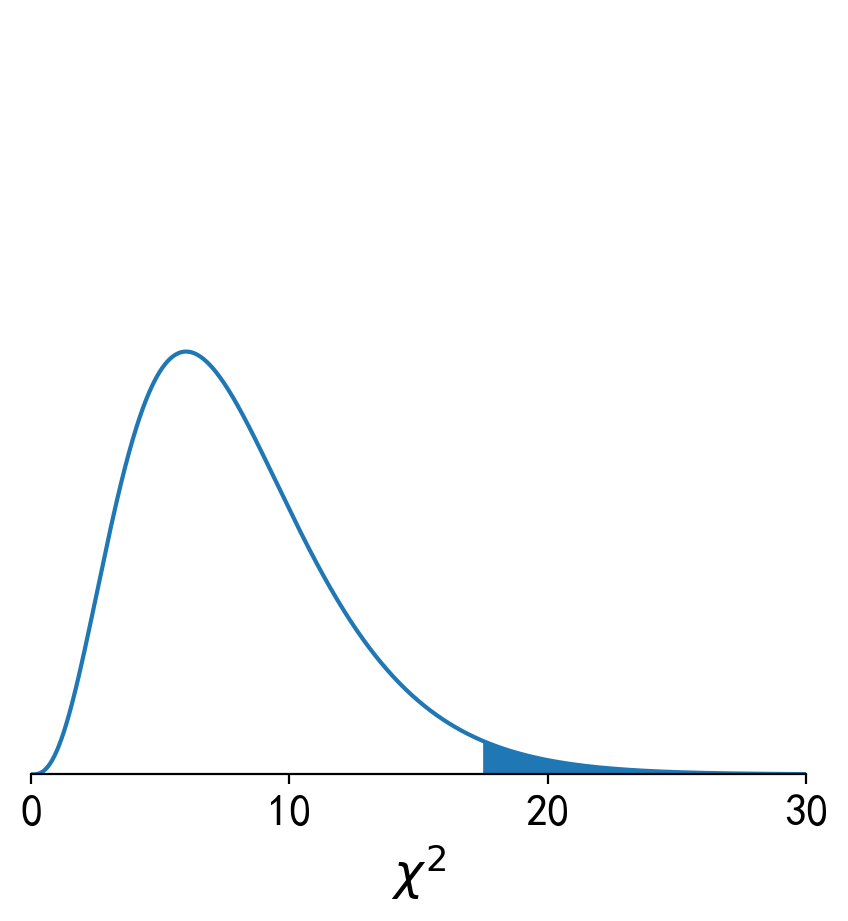

In [9]:
#chi2分布DF=8
df = 8
x_upper_bound, x_lower_bound = 30,0#图x轴范围
rej_x_big,rej_x_small = chi2.ppf(.975,df),chi2.ppf(.025,df)


xs = [x for x in np.linspace(x_lower_bound,x_upper_bound,1000)]
ys = [chi2_dis(x,df) for x in xs]
x_lower_fill = list(np.linspace(x_lower_bound,rej_x_small,int((rej_x_small-x_lower_bound)/0.1)))
x_upper_fill = list(np.linspace(rej_x_big,x_upper_bound,int((x_upper_bound-rej_x_big)/0.1)))

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)
plt.plot(xs, ys)

plt.ylim(0,0.2)
plt.xlim(0,30)


plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[chi2_dis(x,df) for x in x_upper_fill],color='#1f77b4')

plt.xticks(range(0,31,10),[x for x in range(0,31,10)],fontsize=16)
plt.yticks([],fontsize=16)
plt.xlabel(r'$\chi^2$',fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('chi8rej1.png')

#  第Ⅰ、Ⅱ类错误关系图

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 
from scipy.stats import t

def normal_dis(x, mu=0, sigma=1):
    '''
    x： 输入待计算的值
    μ： (mu, 读作：谬) 为数学期望, 
    σ (sigma, 读作：西格玛）为标准差
    '''
    # k = 0.3989422804014327 / mu # 1.0 / math.sqrt(2 * math.pi)
    return 0.3989422804014327 / sigma * math.exp(- (x - mu) * (x - mu) / (2 * sigma * sigma))
 

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


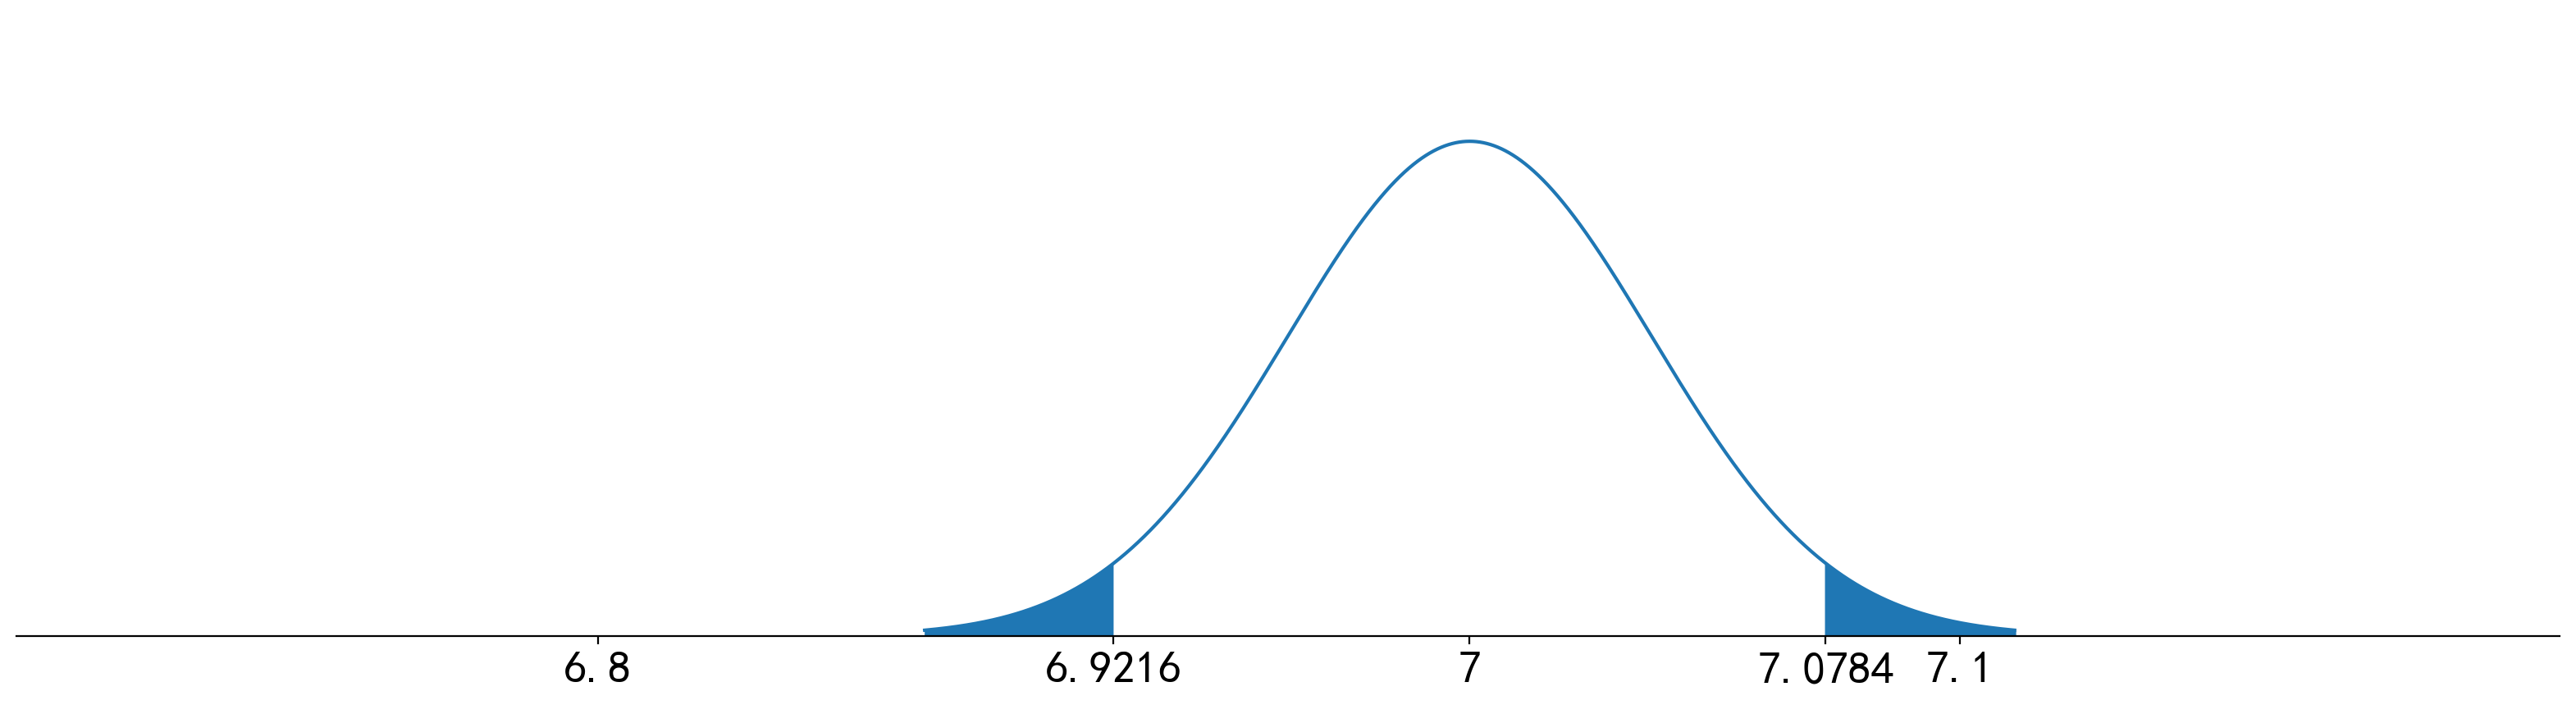

In [11]:
# mu 和 sigma
mu, sigma = 0,1#默认0对应7，0.5对应7.1，-1对应6.8
x_upper_bound, x_lower_bound = 6,-8#图x轴范围
plt_x_upper_bound, plt_x_lower_bound = mu+3,mu-3#绘图的界
rej_x_big,rej_x_small = 1.96,-1.96

x_lower_fill = list(np.linspace(plt_x_lower_bound,rej_x_small,int((rej_x_small-plt_x_lower_bound)/0.001)))
x_upper_fill = list(np.linspace(rej_x_big,plt_x_upper_bound,int((plt_x_upper_bound-rej_x_big)/0.001)))

xs = [x for x in np.linspace(plt_x_lower_bound,plt_x_upper_bound,6000)]
ys = [normal_dis(x, mu, sigma) for x in xs]

fig, ax=plt.subplots(figsize=(20, 5),dpi=200)
plt.plot(xs, ys,color='#1f77b4')

plt.xlim(x_lower_bound,x_upper_bound)
plt.ylim(0,0.5)

plt.xticks([-4.8,0,2.7,1.96,-1.96],[6.8,7,7.1,7.0784,6.9216],fontsize=20)
plt.yticks([],fontsize=16)
#plt.xlabel(r'$\chi^2$',fontsize=18)

plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[normal_dis(x,mu,sigma) for x in x_lower_fill])
plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[normal_dis(x,mu,sigma) for x in x_upper_fill],color='#1f77b4')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


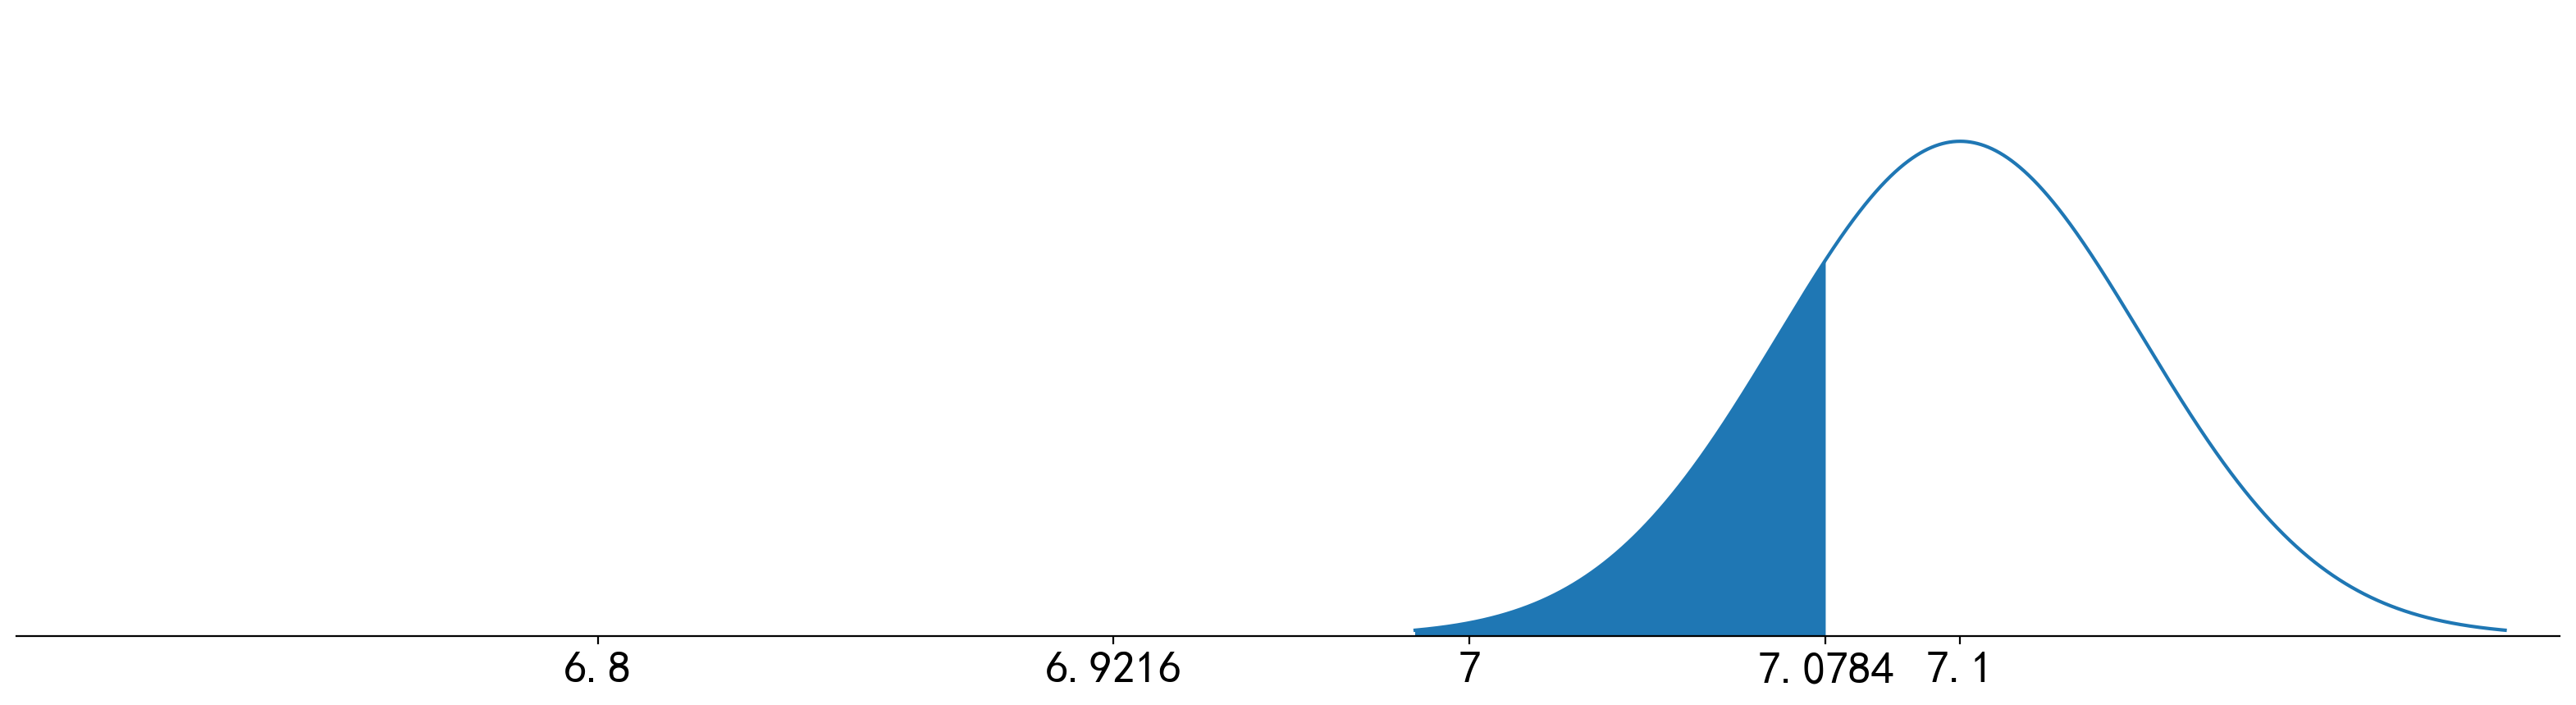

In [12]:
# mu 和 sigma
mu, sigma = 2.7,1#默认0对应7，0.5对应7.1，-1对应6.8
x_upper_bound, x_lower_bound = 6,-8#图x轴范围
plt_x_upper_bound, plt_x_lower_bound = mu+3,mu-3#绘图的界
rej_x_big,rej_x_small = 1.96,-1.96

x_lower_fill = list(np.linspace(plt_x_lower_bound,rej_x_big,int((rej_x_big-plt_x_lower_bound)/0.001)))
#x_upper_fill = list(np.linspace(rej_x_big,plt_x_upper_bound,int((plt_x_upper_bound-rej_x_big)/0.001)))

xs = [x for x in np.linspace(plt_x_lower_bound,plt_x_upper_bound,6000)]
ys = [normal_dis(x, mu, sigma) for x in xs]

fig, ax=plt.subplots(figsize=(20, 5),dpi=200)
plt.plot(xs, ys,color='#1f77b4')

plt.xlim(x_lower_bound,x_upper_bound)
plt.ylim(0,0.5)

plt.xticks([-4.8,0,2.7,1.96,-1.96],[6.8,7,7.1,7.0784,6.9216],fontsize=20)
plt.yticks([],fontsize=16)
#plt.xlabel(r'$\chi^2$',fontsize=18)

plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[normal_dis(x,mu,sigma) for x in x_lower_fill])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

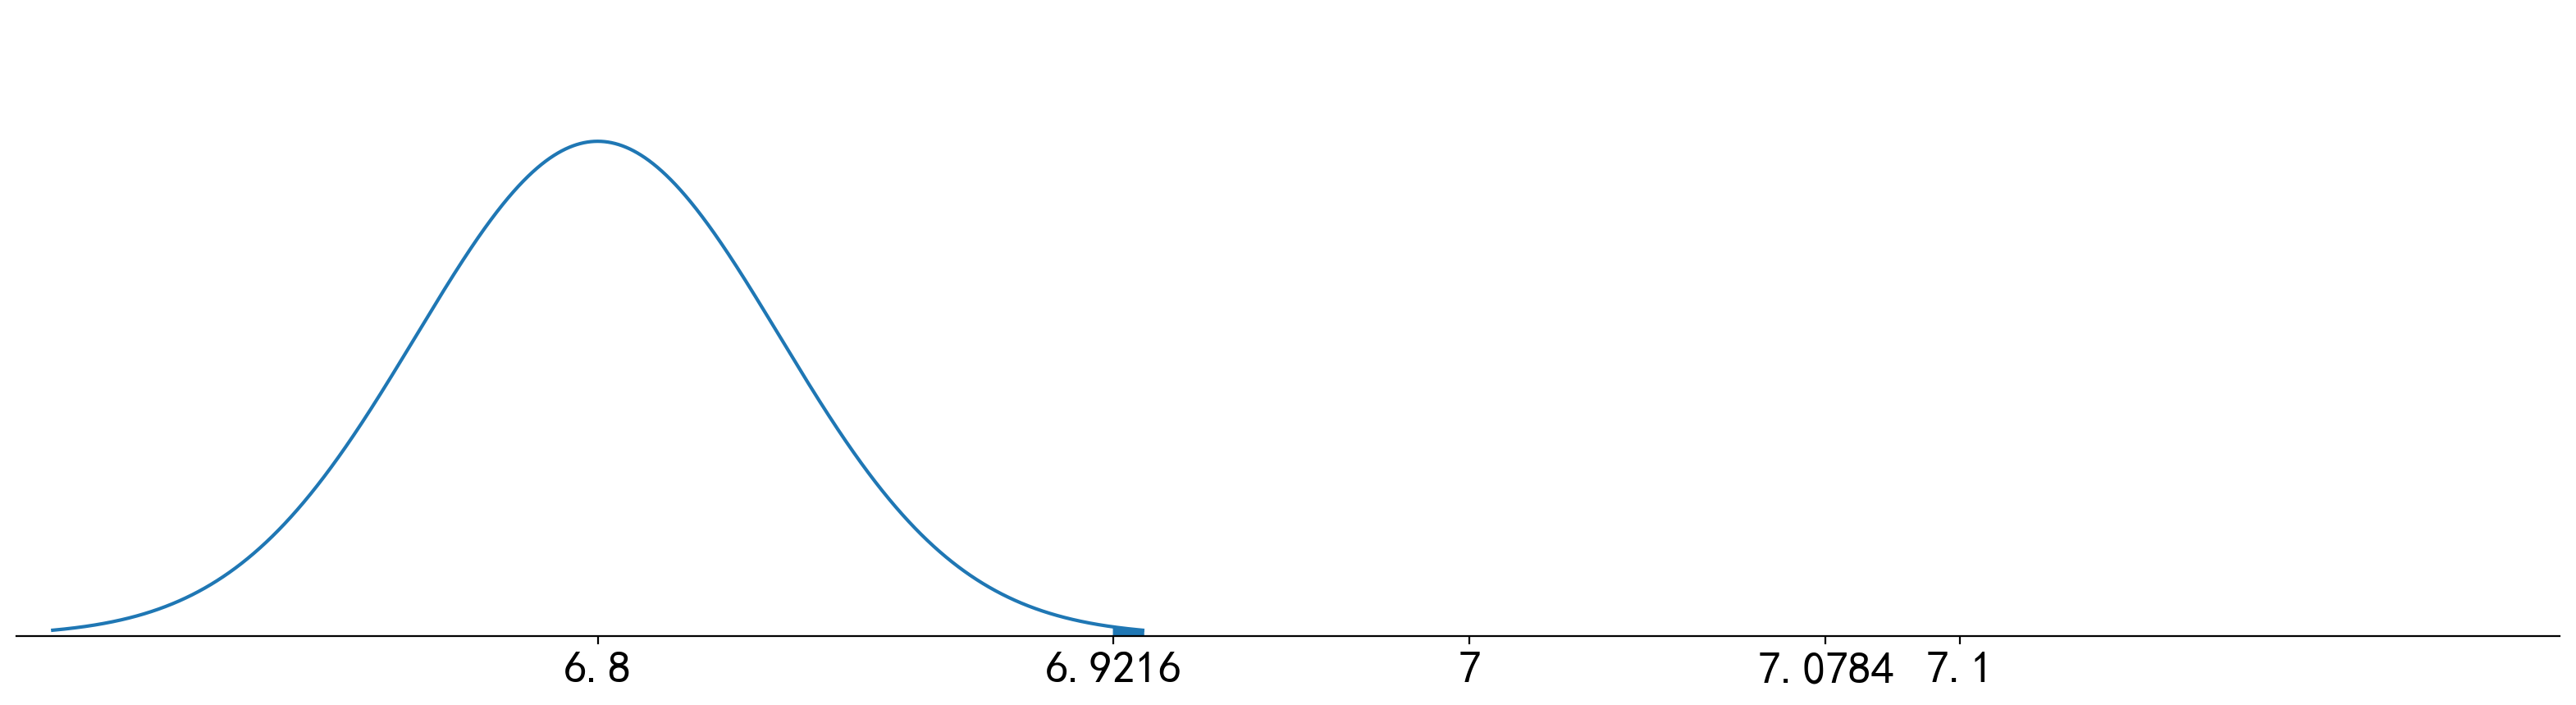

In [13]:
# mu 和 sigma
mu, sigma = -4.8,1#默认0对应7，0.5对应7.1，-1对应6.8
x_upper_bound, x_lower_bound = 6,-8#图x轴范围
plt_x_upper_bound, plt_x_lower_bound = mu+3,mu-3#绘图的界
rej_x_big,rej_x_small = 1.96,-1.96

#x_lower_fill = list(np.linspace(plt_x_lower_bound,rej_x_big,int((rej_x_big-plt_x_lower_bound)/0.001)))
x_upper_fill = list(np.linspace(rej_x_small,plt_x_upper_bound,int((plt_x_upper_bound-rej_x_small)/0.001)))

xs = [x for x in np.linspace(plt_x_lower_bound,plt_x_upper_bound,6000)]
ys = [normal_dis(x, mu, sigma) for x in xs]

fig, ax=plt.subplots(figsize=(20, 5),dpi=200)
plt.plot(xs, ys,color='#1f77b4')

plt.xlim(x_lower_bound,x_upper_bound)
plt.ylim(0,0.5)

plt.xticks([-4.8,0,2.7,1.96,-1.96],[6.8,7,7.1,7.0784,6.9216],fontsize=20)
plt.yticks([],fontsize=16)
#plt.xlabel(r'$\chi^2$',fontsize=18)

plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[normal_dis(x,mu,sigma) for x in x_upper_fill],color='#1f77b4')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# 第Ⅱ类错误与样本量关系示意图

In [14]:
#犯第二类错误概率
def type2err_prob(n,H1_mu):
    
    sigma = 0.2
    H0_mu = 7
    
    u_975 = norm.ppf(.975)
    
    accept_low,accept_up = -u_975*np.sqrt(sigma*sigma/n) + H0_mu, u_975*np.sqrt(sigma*sigma/n) + H0_mu
    
    up = accept_up-H1_mu
    up /= np.sqrt(sigma*sigma/n)
    low = accept_low - H1_mu
    low /= np.sqrt(sigma*sigma/n)
    
    p = norm.cdf(up) - norm.cdf(low)
    
    return p

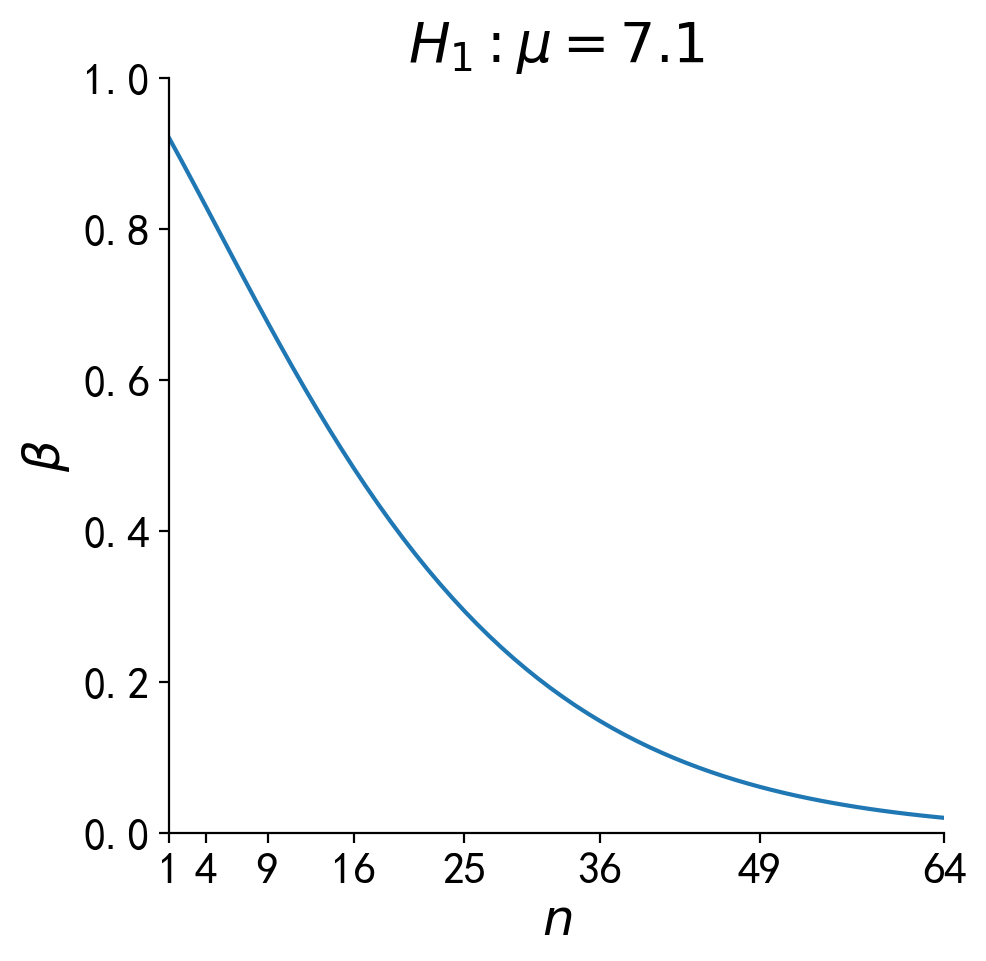

In [15]:
x_upper_bound, x_lower_bound = 60,0#图x轴范围
rej_x_big,rej_x_small = chi2.ppf(.95,df),chi2.ppf(.05,df)

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)

xs = [x for x in range(1,65)]
ys = [type2err_prob(x,7.1) for x in xs]

plt.plot(xs, ys)

plt.ylim(0,1)
plt.xlim(1,64)

#plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[chi2_dis(x) for x in x_lower_fill])
#plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[chi2_dis(x) for x in x_upper_fill],color='#1f77b4')

plt.xticks([i*i for i in range(1,9)],[i*i for i in range(1,9)],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$n$',fontsize=18)
plt.ylabel(r'$\beta$',fontsize=18)
plt.title(r'$H_1:\mu=7.1$',fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

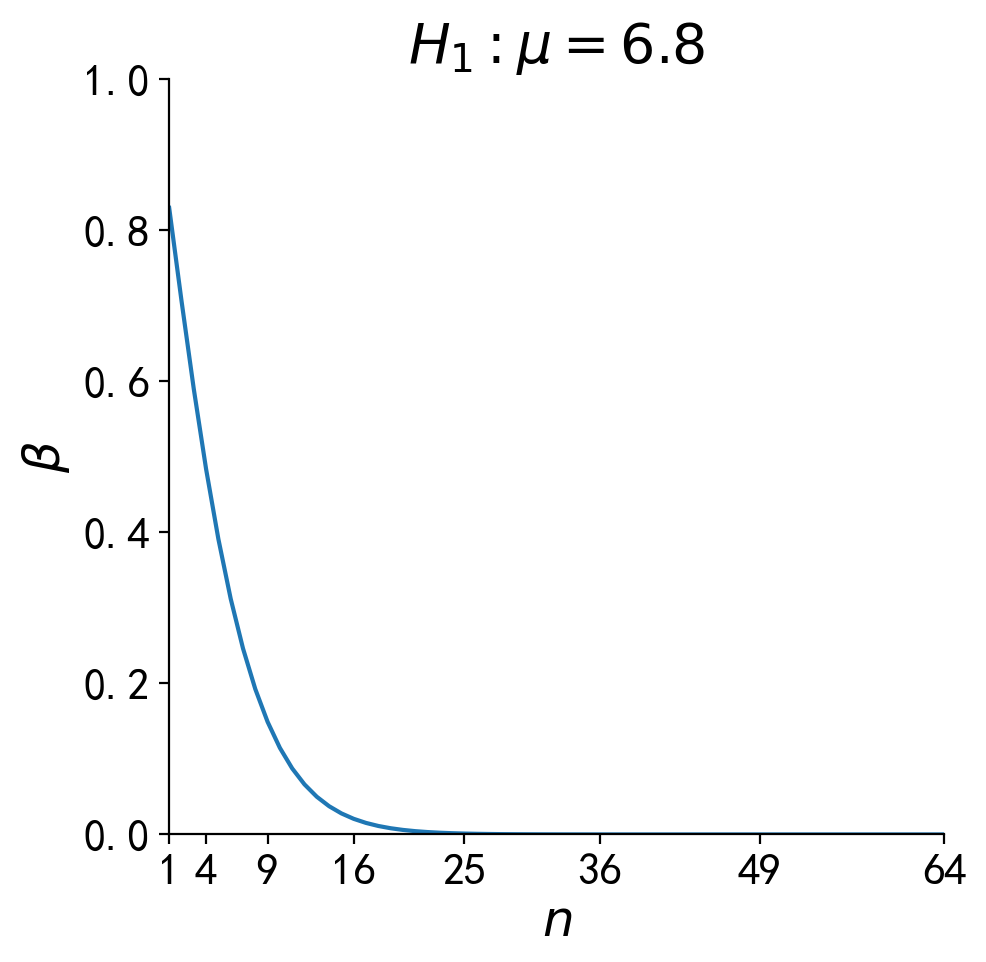

In [16]:
x_upper_bound, x_lower_bound = 60,0#图x轴范围
rej_x_big,rej_x_small = chi2.ppf(.95,df),chi2.ppf(.05,df)

fig, ax=plt.subplots(figsize=(5, 5),dpi=200)

xs = [x for x in range(1,65)]
ys = [type2err_prob(x,6.8) for x in xs]

plt.plot(xs, ys)

plt.ylim(0,1)
plt.xlim(1,64)

#plt.fill_between(x_lower_fill,[0]*len(x_lower_fill),[chi2_dis(x) for x in x_lower_fill])
#plt.fill_between(x_upper_fill,[0]*len(x_upper_fill),[chi2_dis(x) for x in x_upper_fill],color='#1f77b4')

plt.xticks([i*i for i in range(1,9)],[i*i for i in range(1,9)],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$n$',fontsize=18)
plt.ylabel(r'$\beta$',fontsize=18)
plt.title(r'$H_1:\mu=6.8$',fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)